In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
def generate_experiment_df(samples_per_combo=50, seed=42, sigma=0.01):
    """
    samples_per_combo: number of rows per (clientsPerPi, intertransmission_window_ms) combo
    seed: RNG seed for reproducibility
    sigma: std deviation for accuracy noise (in absolute percentage units, e.g. 0.01 = 1%)
    """
    rng = np.random.default_rng(seed)

    clients = np.arange(1, 7)  # 1..6
    windows_ms = np.array([10, 20, 30, 40])  # ms
    windows_s = windows_ms / 1000.0

    # Mean accuracy: 0.98 at 0.01 s (10 ms) -> 0.85 at 0.04 s (40 ms), linear in time
    mean_by_window = np.interp(windows_s, [0.01, 0.04], [0.98, 0.85])

    rows = []
    for c in clients:
        for w_ms, mu in zip(windows_ms, mean_by_window):
            # Normally distributed around mu with std sigma, clipped to [0,1]
            acc = rng.normal(loc=mu, scale=sigma, size=samples_per_combo)
            acc = np.clip(acc, 0.0, 1.0)
            rows.append(pd.DataFrame({
                "clientsPerPi": c,
                "intertransmission_window_ms": w_ms,
                "accuracy_percentage": acc
            }))

    df = pd.concat(rows, ignore_index=True)
    return df


In [34]:
def boxplot_accuracy(df):
    #For each resolution find CFLAGS with highest MFlops
    # Filter the original DataFrame to include only the best CFLAGS
    df_acc = df

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_acc, x="intertransmission_window_ms", y="accuracy_percentage", hue="clientsPerPi")
    #Prevent plot being cut off at the bottom

    plt.title("Accuracy by Intertransmission Window for differing clients per Pi")
    plt.ylabel("Accuracy [%]")
    plt.xlabel("Intertransmission Window [ms]")
    plt.legend(title="Clients per Pi", loc='upper right')
    plt.tight_layout()

    plt.savefig("accuracy_artificial_boxplot.svg")



In [35]:
df = generate_experiment_df()

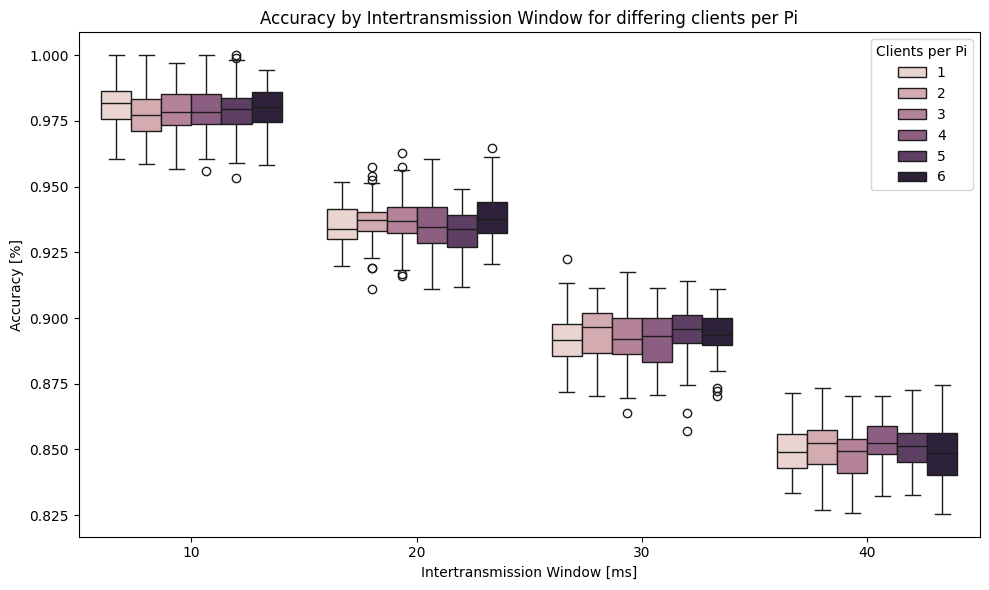

In [37]:
boxplot_accuracy(df)


In [33]:

#save to CSV
df.to_csv("testdata_accuracy.csv", index=False)
print(df.head())

# (Optional) quick sanity checks:
print("\nCounts per clientsPerPi:")
print(df.groupby("clientsPerPi").size())

print("\nMean accuracy by window (ms):")
print(df.groupby("intertransmission_window_ms")["accuracy_percentage"].mean().round(4))


print("Generating synthetic data...")
df = generateSyntheticData(1000)
print(df.head())

   clientsPerPi  intertransmission_window_ms  accuracy_percentage
0             1                           10             0.983047
1             1                           10             0.969600
2             1                           10             0.987505
3             1                           10             0.989406
4             1                           10             0.960490

Counts per clientsPerPi:
clientsPerPi
1    200
2    200
3    200
4    200
5    200
6    200
dtype: int64

Mean accuracy by window (ms):
intertransmission_window_ms
10    0.9794
20    0.9359
30    0.8934
40    0.8503
Name: accuracy_percentage, dtype: float64
Generating synthetic data...
       speed
0  63.423683
1  68.618054
2  79.514834
3  84.847589
4  69.106272
